In [15]:
# an example for the preprocessing some text

from bs4 import BeautifulSoup
from urllib3 import PoolManager
import re
import os

# use urllib3 and bs4 (BeautifulSoup4) to retrieve a document
manager = PoolManager(10)
url  = manager.request('GET', 'http://avalon.law.yale.edu/19th_century/gettyb.asp')
soup = BeautifulSoup(url.data)

text = soup.p.contents[0]
text_1 = text.lower()
text_2 = re.sub('\W', ' ', text_1)
# use nltk to play around with the text
from nltk import word_tokenize
from nltk import bigrams
from nltk import trigrams
from nltk import ngrams
from nltk.corpus import stopwords
text_3 = word_tokenize(text_2)
text_3_bi = bigrams(text_3)
text_3_tri = trigrams(text_3)
text_3_n = ngrams(text_3, 4)

# use stop words from nltk
stop_words = stopwords.words('english')+["based", "regarding"]

# identify the stop words and then remove them from the text
# a simple loop is used
text_4 = [x for x in text_3 if x not in stop_words]

# check what was removed
text_rem = [x for x in text_3 if x not in text_4]

# use a similar format to apply various stemming/lemmatizing/synonyms algorithms
from nltk.stem.lancaster import LancasterStemmer

st = LancasterStemmer()

from nltk.stem import PorterStemmer

pt = PorterStemmer()

from nltk.stem.snowball import EnglishStemmer

sb = EnglishStemmer()

from nltk.stem.wordnet import WordNetLemmatizer

wn = WordNetLemmatizer()

# examine the word "better"
st.stem('better')
pt.stem('better')
sb.stem('better')
wn.lemmatize('better', 'a')

# apply the porter stemmer to the gettysburg address

text_5 = map(pt.stem, text_4)

# create a dictionary that will count the occurrence of the words
getty = {}
used = []
for word in text_5:
    if word in getty:
        getty[word] += 1
    if word not in getty and word not in used:
        getty[word] = 1
        used.append(word)

getty_count = list(getty.values())
getty_keys = list(getty.keys())

# write to a file
rfile = open('GettysburgFinal.txt', 'w')
rfile.write('stem, count')
rfile.write('\n')

for j in range(len(getty_keys)):
    rfile.write('%s,%s' % (getty_keys[j], getty_count[j]))
    rfile.write('\n')

rfile.close()

In [16]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.tools as tls
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS

In [17]:
#load data and convert into into dataframe
def df_GettysburgFinal():
    file_name =  r'C:\Users\redadg\Desktop\Old Desktop\MS\Programming for data science\Assignmnets\Module 8\GettysburgFinal.txt'
    # sheet name or sheet number or list of sheet numbers and names
    with open(file_name) as f:
        mylist = [line.rstrip('\n') for line in f]        
    data = mylist
    df = pd.DataFrame(data)
    #grab the first row for the header
    new_header = df.iloc[0] 
    #take the data less the header row
    df = df[1:]
    df.columns = new_header
    #splitting 
    df = df['stem, count'].str.split(",",expand=True,)
    #rename the column name
    df.columns = ['Stem', 'Count']
    #sort the text
    sorted_data = df.sort_values(by=['Count'], ascending=False, na_position='first')
    return sorted_data
df_GettysburgFinal().head()

,Stem,Count
13,dedic,6
10,nation,5
35,live,4
80,shall,3
87,peopl,3


In [18]:
def percentage_word():
    #add third column that shows the percentage of the count in ascending order
    get_text = df_GettysburgFinal()
    #add a percentage column
    get_text['percentage'] = (get_text['Count']).astype(float)/(get_text['Count']).astype(float).sum()
    return get_text
percentage_word().head()

,Stem,Count,percentage
13,dedic,6,0.049587
10,nation,5,0.041322
35,live,4,0.033058
80,shall,3,0.024793
87,peopl,3,0.024793


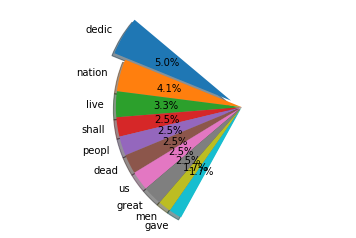

In [19]:
def pie_plot():
    #pie chart for the top 10 stem of higher percentage
    #Data to plot
    sorted_data = percentage_word()
    labels = sorted_data['Stem'][:10]
    sizes = sorted_data['percentage'][:10]
    #colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice
    #Plot
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
#call the function
pie_plot()

# Generating WordClouds For GettysburgFinal.txt

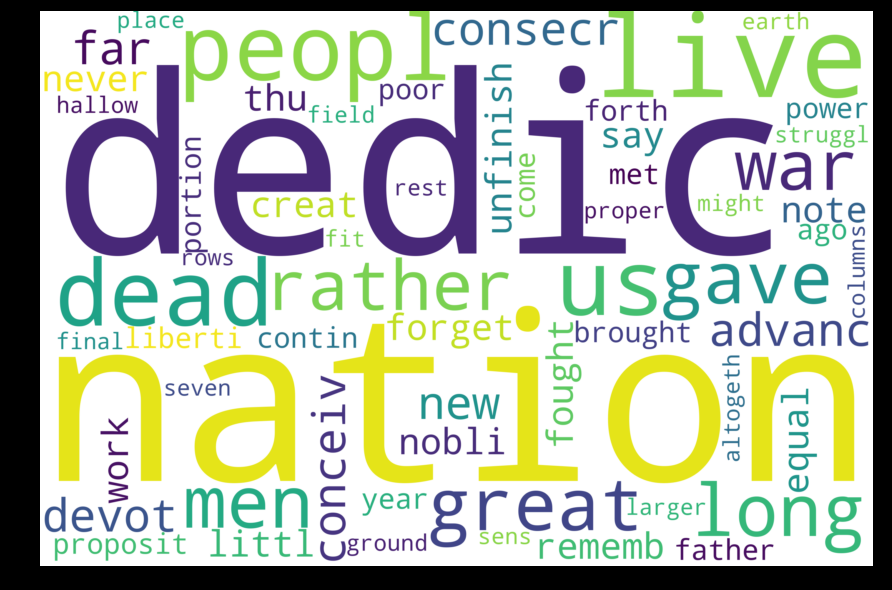

In [21]:
#Word Cloud is a data visualization technique used for representing text data in 
#which the size of each word indicates its frequency or importance.
def WordClouds():
    get_texts= percentage_word()
    #remove the column name to display only the words
    get_texts.columns = ['', '', '']
    wordcloud = WordCloud(width = 3000,height = 2000,background_color = 'white',stopwords = STOPWORDS).generate(str(get_texts))
    fig = plt.figure(figsize = (12, 8),
                     facecolor = 'k',
                     edgecolor = 'k')
    #plot
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
#call the function visualize the size of the text   
WordClouds()